In [1]:
import numpy as np
import scipy as sp
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url='https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/realwage.csv'
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"


In [4]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1408 non-null   int64  
 1   Time        1408 non-null   object 
 2   Country     1408 non-null   object 
 3   Series      1408 non-null   object 
 4   Pay period  1408 non-null   object 
 5   value       1340 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 66.1+ KB
(1408, 6)


We will use pivot_table to create a wide format panel, with a MultiIndex to handle higher dimensional data.
pivot_table arguments should specify the data (values), the index, and the columns we want in our resulting dataframe.
By passing a list in columns, we can create a MultiIndex in our column axis

In [5]:
realwage=df.pivot_table(values="value",
                       index='Time',
                       columns=['Country','Series','Pay period'])

In [6]:
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                               \
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                          23,826.64  12.06   
2007-01-01                                          24,616.84  12.46   
2008-01-01                                          24,185.70  12.24   
2009-01-01                                          24,496.84  12.40   
2010-01-01                                          24,373.76  12.34   

Country                                     Belgium         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                21,042.28  10.09   
2007-01-01                                21,310.05  10.22   
2008-01-01                                21,416.96  10.27   
2009-01-01                                22,140.19  10.62   
2010-01-01                                21,810.28  10.46   

Country                                                               \
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                          20,228.74   9.70   
2007-01-01                                          20,486.16   9.82   
2008-01-01                                          20,588.93   9.87   
2009-01-01                                          21,284.21  10.21   
2010-01-01                                          20,967.05  10.05   

Country                                      Brazil         ...  \
Series     In 2015 constant prices at 2015 USD PPPs         ...   
Pay period                                   Annual Hourly  ...   
Time                                                        ...   
2006-01-01                                 3,310.51   1.41  ...   
2007-01-01                                 3,525.45   1.50  ...   
2008-01-01                                 3,664.39   1.56  ...   
2009-01-01                                 3,934.77   1.68  ...   
2010-01-01                                 4,145.69   1.80  ...   

Country                                                Turkey         \
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                           4,741.16   2.27   
2007-01-01                                           4,710.42   2.26   
2008-01-01                                           4,635.16   2.22   
2009-01-01                                           4,753.90   2.28   
2010-01-01                                           4,799.28   2.30   

Country                              United Kingdom         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                16,764.97   8.07   
2007-01-01           

In [7]:
realwage.index=pd.to_datetime(realwage.index)

A MultiIndex is the simplest and most flexible way to manage panel data in pandas

In [11]:
realwage.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

In [12]:
realwage['United States'].head()

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88

stack(   ) rotates the lowest level of the column MultiIndex to the row index

In [13]:
realwage.stack().head()

Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    20,410.65   
           Hourly                                        10.33   
2007-01-01 Annual                                    21,087.57   
           Hourly                                        10.67   
2008-01-01 Annual                                    20,718.24   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23,826.64   
           Hourly                                                  12.06   
2007-01-01 Annual                                              24,616.84   
           Hourly                                                  12.46   
2008-01-01 Annual                                              24,185.70   

Country                                                Belgium  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    21,042.28   
           Hourly                                        10.09   
2007-01-01 Annual                                    21,310.05   
           Hourly                                        10.22   
2008-01-01 Annual                                    21,416.96   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20,228.74   
           Hourly                                                   9.70   
2007-01-01 Annual                                              20,486.16   
           Hourly                                                   9.82   
2008-01-01 Annual                                              20,588.93   

Country                                                 Brazil  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                     3,310.51   
           Hourly                                         1.41   
2007-01-01 Annual                                     3,525.45   
           Hourly                                         1.50   
2008-01-01 Annual                                     3,664.39   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                               2,032.87   
           Hourly                                                   0.87   
2007-01-01 Annual                                               2,164.86   
           Hourly                                                   0.92   
2008-01-01 Annual                                               2,250.18   

Country                                                 Canada  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    13,649.69   
           Hourly                                         6.56   
2007-01-01 Annual                                    13,785.93   
           Hourly                                         6.63   
2008-01-01 Annual                                    14,342.76   

Country                                                  

We can also pass in an argument to select the level we would like to stack

In [14]:
realwage.stack(level='Country')

Series                    In 2015 constant prices at 2015 USD PPPs         \
Pay period                                                  Annual Hourly   
Time       Country                                                          
2006-01-01 Australia                                     20,410.65  10.33   
           Belgium                                       21,042.28  10.09   
           Brazil                                         3,310.51   1.41   
           Canada                                        13,649.69   6.56   
           Chile                                          5,201.65   2.22   
...                                                            ...    ...   
2016-01-01 Slovenia                                      14,520.80   6.96   
           Spain                                         12,317.41   5.06   
           Turkey                                        12,074.76   5.79   
           United Kingdom                                17,568.33   8.44   
           United States                                 14,892.12   7.16   

Series                    In 2015 constant prices at 2015 USD exchange rates  \
Pay period                                                            Annual   
Time       Country                                                             
2006-01-01 Australia                                               23,826.64   
           Belgium                                                 20,228.74   
           Brazil                                                   2,032.87   
           Canada                                                  14,335.12   
           Chile                                                    3,333.76   
...                                                                      ...   
2016-01-01 Slovenia                                                10,533.06   
           Spain                                                   10,191.91   
           Turkey                                                   6,741.96   
           United Kingdom                                          21,352.73   
           United States                                           14,892.12   

Series                            
Pay period                Hourly  
Time       Country                
2006-01-01 Australia       12.06  
           Belgium          9.70  
           Brazil           0.87  
           Canada           6.89  
           Chile            1.42  
...                          ...  
2016-01-01 Slovenia         5.05  
           Spain            4.19  
           Turkey           3.23  
           United Kingdom  10.26  
           United States    7.16  

[335 rows x 4 columns]

Using a DatetimeIndex makes it easy to select a particular time period.

Selecting one year and stacking the two lower levels of the MultiIndex creates a cross- section of our panel data

In [15]:
realwage['2015'].stack(level=(1,2)).head()

Country                                                                   Australia  \
Time       Series                                             Pay period              
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual      21,715.53   
                                                              Hourly          10.99   
           In 2015 constant prices at 2015 USD exchange rates Annual      25,349.90   
                                                              Hourly          12.83   

Country                                                                    Belgium  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     21,588.12   
                                                              Hourly         10.35   
           In 2015 constant prices at 2015 USD exchange rates Annual     20,753.48   
                                                              Hourly          9.95   

Country                                                                    Brazil  \
Time       Series                                             Pay period            
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     4,628.63   
                                                              Hourly         2.00   
           In 2015 constant prices at 2015 USD exchange rates Annual     2,842.28   
                                                              Hourly         1.21   

Country                                                                     Canada  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     16,536.83   
                                                              Hourly          7.95   
           In 2015 constant prices at 2015 USD exchange rates Annual     17,367.24   
                                                              Hourly          8.35   

Country                                                                     Chile  \
Time       Series                                             Pay period            
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     6,633.56   
                                                              Hourly         2.80   
           In 2015 constant prices at 2015 USD exchange rates Annual     4,251.49   
                                                              Hourly         1.81   

Country                                                                   Colombia  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual      6,983.53   
                                                              Hourly          2.40   
           In 2015 constant prices at 2015 USD exchange rates Annual      3,290.04   
                                                              Hourly          1.13   

Country                                                                   Costa Rica  \
Time       Series                                             Pay period               
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual       10,561.54   
                                                              Hourly            3.60   
           In 2015 constant prices at 2015 USD exchange rates Annual        7,467.49   
                                                              Hourly            2.56   

Country                                                                   Czech Republic  \
Time       Series                                             Pay period                   
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual            7,856.81   
                                                              Hourly                3.91   
       

In [16]:
realwage['2015'].stack(level=(1,2)).head().transpose().head()

Time                                     2015-01-01         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Country                                                      
Australia                                 21,715.53  10.99   
Belgium                                   21,588.12  10.35   
Brazil                                     4,628.63   2.00   
Canada                                    16,536.83   7.95   
Chile                                      6,633.56   2.80   

Time                                                                  
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Country                                                               
Australia                                           25,349.90  12.83  
Belgium                                             20,753.48   9.95  
Brazil                                               2,842.28   1.21  
Canada                                              17,367.24   8.35  
Chile                                                4,251.49   1.81

we can use the xs method to select values at lower levels in the multiindex, while keeping the higher levels (countries in this case)

In [19]:
realwage_f=realwage.xs(('Hourly','In 2015 constant prices at 2015 USD exchange rates'),level=('Pay period','Series'),axis=1)

In [22]:
realwage_f.transpose().head()

Time,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01
Country,,,,,,,,,,,
Australia,12.06,12.46,12.24,12.40,12.34,12.43,12.60,12.64,12.67,12.83,12.98
Belgium,9.70,9.82,9.87,10.21,10.05,9.97,9.95,10.04,10.01,9.95,9.76
Brazil,0.87,0.92,0.96,1.03,1.08,1.09,1.18,1.21,1.21,1.21,1.24
Canada,6.89,6.96,7.24,7.67,7.94,7.97,8.12,8.17,8.22,8.35,8.48
Chile,1.42,1.45,1.44,1.52,1.56,1.59,1.63,1.72,1.76,1.81,1.91


In [26]:
url1='https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/countries.csv'
df2 = pd.read_csv(url1,sep=';')
df2.head()

,Country (en),Country (de),Country (local),Country code,Continent,Capital,Population,Area,Coastline,Government form,Currency,Currency code,Dialing prefix,Birthrate,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,AF,Asia,nan,33332025,652230,0,Presidential islamic republic,Afghani,AFN,93,38.30,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,EG,Africa,nan,94666993,1001450,2450,Presidential republic,Pfund,EGP,20,30.30,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,AX,Europe,nan,29013,1580,0,Autonomous region of Finland,Euro,EUR,358,0.00,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,AL,Europe,nan,3038594,28748,362,parliamentary republic,Lek,ALL,355,13.10,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,DZ,Africa,nan,40263711,2381741,998,Presidential republic,Dinar,DZD,213,23.00,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


In [28]:
df2=df2[['Country (en)','Continent']]
df2=df2.rename(columns={'Country (en)':'Country'})
df2.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


In [29]:
realwage_f.transpose().head()

Time,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01
Country,,,,,,,,,,,
Australia,12.06,12.46,12.24,12.40,12.34,12.43,12.60,12.64,12.67,12.83,12.98
Belgium,9.70,9.82,9.87,10.21,10.05,9.97,9.95,10.04,10.01,9.95,9.76
Brazil,0.87,0.92,0.96,1.03,1.08,1.09,1.18,1.21,1.21,1.21,1.24
Canada,6.89,6.96,7.24,7.67,7.94,7.97,8.12,8.17,8.22,8.35,8.48
Chile,1.42,1.45,1.44,1.52,1.56,1.59,1.63,1.72,1.76,1.81,1.91


In [30]:
merged=pd.merge(realwage_f.transpose(),df2,how='left',left_index=True,on='Country')

In [31]:
merged.head()

,Country,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,Continent
17.00,Australia,12.06,12.46,12.24,12.40,12.34,12.43,12.60,12.64,12.67,12.83,12.98,Australia
23.00,Belgium,9.70,9.82,9.87,10.21,10.05,9.97,9.95,10.04,10.01,9.95,9.76,Europe
32.00,Brazil,0.87,0.92,0.96,1.03,1.08,1.09,1.18,1.21,1.21,1.21,1.24,South America
100.00,Canada,6.89,6.96,7.24,7.67,7.94,7.97,8.12,8.17,8.22,8.35,8.48,North America
38.00,Chile,1.42,1.45,1.44,1.52,1.56,1.59,1.63,1.72,1.76,1.81,1.91,South America


Countries that appeared in realwage_f but not in worlddata will have NaN in the Conti-
nent column.

In [32]:
merged[merged['Continent'].isnull()]

,Country,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,Continent
nan,Korea,3.42,3.74,3.87,4.00,3.99,4.03,4.18,4.38,4.64,4.93,5.28,NaN
nan,Russian Federation,0.23,0.45,0.39,0.66,0.62,0.59,0.58,0.61,0.61,0.56,0.55,NaN
nan,Slovak Republic,1.50,1.64,1.71,1.88,1.96,2.02,2.08,2.08,2.08,2.08,2.08,NaN


.map() will match countries in merged['Country'] with their continent from the dictio- nary.

In [35]:
missing_continents={'Korea':'Asia','Russian Federation': 'Europe',
'Slovak Republic': 'Europe'}

In [36]:
merged['Country'].map(missing_continents)

17.00        NaN
23.00        NaN
32.00        NaN
100.00       NaN
38.00        NaN
108.00       NaN
41.00        NaN
225.00       NaN
53.00        NaN
58.00        NaN
45.00        NaN
68.00        NaN
233.00       NaN
86.00        NaN
88.00        NaN
91.00        NaN
nan         Asia
117.00       NaN
122.00       NaN
123.00       NaN
138.00       NaN
153.00       NaN
151.00       NaN
174.00       NaN
175.00       NaN
nan       Europe
nan       Europe
198.00       NaN
200.00       NaN
227.00       NaN
241.00       NaN
240.00       NaN
Name: Country, dtype: object

In [38]:
merged['Continent']=merged['Continent'].fillna(merged['Country'].map(missing_continents))

In [39]:
merged[merged['Country'] == 'Korea']

,Country,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,Continent
nan,Korea,3.42,3.74,3.87,4.00,3.99,4.03,4.18,4.38,4.64,4.93,5.28,Asia


In [40]:
replace=['Central America', 'North America', 'South America']
for country in replace:
    merged['Continent'].replace(to_replace=country,
                               value='America',
                               inplace=True)

In [41]:
merged['Continent'].value_counts(normalize=True)

Europe      0.59
America     0.22
Asia        0.12
Australia   0.06
Name: Continent, dtype: float64

In [43]:
merged['Country'].value_counts(normalize=True)

Lithuania            0.03
Belgium              0.03
Costa Rica           0.03
Slovak Republic      0.03
Portugal             0.03
Germany              0.03
Israel               0.03
Poland               0.03
Hungary              0.03
Spain                0.03
Japan                0.03
Estonia              0.03
France               0.03
Russian Federation   0.03
Brazil               0.03
Chile                0.03
Mexico               0.03
Turkey               0.03
Netherlands          0.03
Latvia               0.03
United Kingdom       0.03
Ireland              0.03
Slovenia             0.03
Colombia             0.03
Canada               0.03
Czech Republic       0.03
New Zealand          0.03
Luxembourg           0.03
Korea                0.03
United States        0.03
Greece               0.03
Australia            0.03
Name: Country, dtype: float64

In [42]:
merged.head(2)

,Country,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,Continent
17.00,Australia,12.06,12.46,12.24,12.40,12.34,12.43,12.60,12.64,12.67,12.83,12.98,Australia
23.00,Belgium,9.70,9.82,9.87,10.21,10.05,9.97,9.95,10.04,10.01,9.95,9.76,Europe


In [44]:
merged=merged.set_index(['Continent', 'Country']).sort_index()

In [45]:
merged.head()

2006-01-01 00:00:00  2007-01-01 00:00:00  \
Continent Country                                                
America   Brazil                     0.87                 0.92   
          Canada                     6.89                 6.96   
          Chile                      1.42                 1.45   
          Colombia                   1.01                 1.02   
          Costa Rica                  nan                  nan   

                      2008-01-01 00:00:00  2009-01-01 00:00:00  \
Continent Country                                                
America   Brazil                     0.96                 1.03   
          Canada                     7.24                 7.67   
          Chile                      1.44                 1.52   
          Colombia                   1.01                 1.04   
          Costa Rica                  nan                  nan   

                      2010-01-01 00:00:00  2011-01-01 00:00:00  \
Continent Country                                                
America   Brazil                     1.08                 1.09   
          Canada                     7.94                 7.97   
          Chile                      1.56                 1.59   
          Colombia                   1.06                 1.06   
          Costa Rica                  nan                  nan   

                      2012-01-01 00:00:00  2013-01-01 00:00:00  \
Continent Country                                                
America   Brazil                     1.18                 1.21   
          Canada                     8.12                 8.17   
          Chile                      1.63                 1.72   
          Colombia                   1.09                 1.11   
          Costa Rica                  nan                  nan   

                      2014-01-01 00:00:00  2015-01-01 00:00:00  \
Continent Country                                                
America   Brazil                     1.21                 1.21   
          Canada                     8.22                 8.35   
          Chile                      1.76                 1.81   
          Colombia                   1.13                 1.13   
          Costa Rica                 2.41                 2.56   

                      2016-01-01 00:00:00  
Continent Country                          
America   Brazil                     1.24  
          Canada                     8.48  
          Chile                      1.91  
          Colombia                   1.12  
          Costa Rica                 2.63

In [46]:
merged.transpose().head()

Continent           America                                          \
Country              Brazil Canada Chile Colombia Costa Rica Mexico   
2006-01-01 00:00:00    0.87   6.89  1.42     1.01        nan   0.53   
2007-01-01 00:00:00    0.92   6.96  1.45     1.02        nan   0.53   
2008-01-01 00:00:00    0.96   7.24  1.44     1.01        nan   0.52   
2009-01-01 00:00:00    1.03   7.67  1.52     1.04        nan   0.52   
2010-01-01 00:00:00    1.08   7.94  1.56     1.06        nan   0.52   

Continent                           Asia              ...    Europe  \
Country             United States Israel Japan Korea  ... Lithuania   
2006-01-01 00:00:00          6.05   5.77  5.69  3.42  ...      1.49   
2007-01-01 00:00:00          6.24   6.03  5.75  3.74  ...      1.59   
2008-01-01 00:00:00          6.78   5.92  5.79  3.87  ...      1.77   
2009-01-01 00:00:00          7.58   5.84  5.99  4.00  ...      1.70   
2010-01-01 00:00:00          7.88   5.68  6.14  3.99  ...      1.68   

Continent                                                                      \
Country             Luxembourg Netherlands Poland Portugal Russian Federation   
2006-01-01 00:00:00      11.46        9.51   1.69     2.79               0.23   
2007-01-01 00:00:00      11.67        9.58   1.71     2.84               0.45   
2008-01-01 00:00:00      11.51        9.61   1.98     2.93               0.39   
2009-01-01 00:00:00      12.00        9.81   2.16     3.12               0.66   
2010-01-01 00:00:00      11.93        9.84   2.17     3.24               0.62   

Continent                                                          
Country             Slovak Republic Slovenia Spain United Kingdom  
2006-01-01 00:00:00            1.50     3.92  3.99           9.81  
2007-01-01 00:00:00            1.64     3.88  4.10          10.07  
2008-01-01 00:00:00            1.71     3.96  4.14          10.04  
2009-01-01 00:00:00            1.88     4.08  4.32          10.15  
2010-01-01 00:00:00            1.96     4.81  4.30           9.96  

[5 rows x 32 columns]

In [47]:
merged.columns = pd.to_datetime(merged.columns) 
merged.columns = merged.columns.rename('Time')
merged.columns

DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [50]:
merged=merged.transpose()

In [51]:
merged.mean().head()

Continent  Country   
America    Brazil       1.09
           Canada       7.82
           Chile        1.62
           Colombia     1.07
           Costa Rica   2.53
dtype: float64

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.style.use('seaborn')


In [54]:
merged.mean().sort_values(ascending=False)

Continent  Country           
Australia  Australia            12.51
Europe     Luxembourg           11.94
           France               10.42
           Belgium               9.94
           United Kingdom        9.92
           Ireland               9.70
           Netherlands           9.64
Australia  New Zealand           9.54
Europe     Germany               9.40
America    Canada                7.82
           United States         7.15
Asia       Japan                 6.18
           Israel                5.95
Europe     Slovenia              4.60
Asia       Korea                 4.22
Europe     Spain                 4.16
           Greece                4.11
           Portugal              3.10
America    Costa Rica            2.53
Asia       Turkey                2.46
Europe     Poland                2.24
           Czech Republic        2.15
           Estonia               2.08
           Slovak Republic       1.92
           Hungary               1.90
           Latvia   

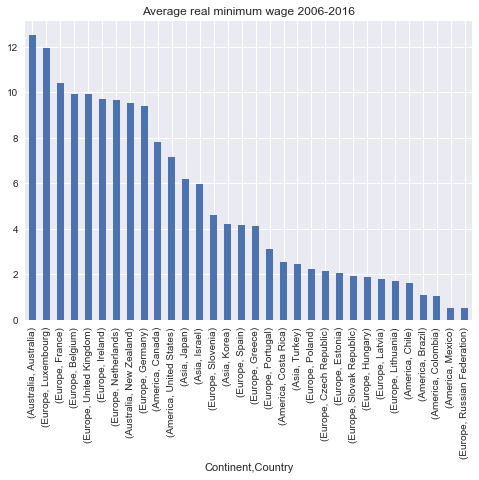

In [55]:
merged.mean().sort_values(ascending=False).plot(kind='bar',title=
                                               'Average real minimum wage 2006-2016')

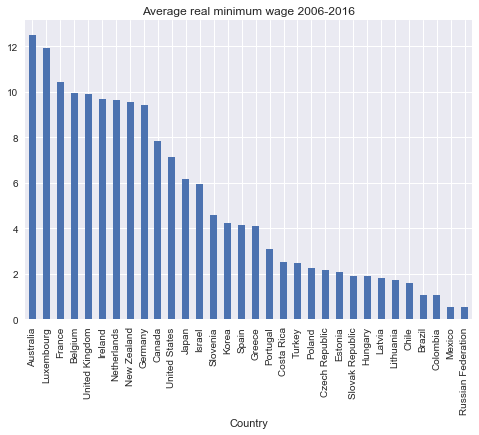

In [58]:
merged.mean().sort_values(ascending=False).plot(kind='bar',title=
                                               'Average real minimum wage 2006-2016')
country_labels =merged.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels) 
plt.xlabel('Country')
plt.show()

In [59]:
merged.mean(axis=1).head()

Time
2006-01-01   4.69
2007-01-01   4.84
2008-01-01   4.90
2009-01-01   5.08
2010-01-01   5.11
dtype: float64

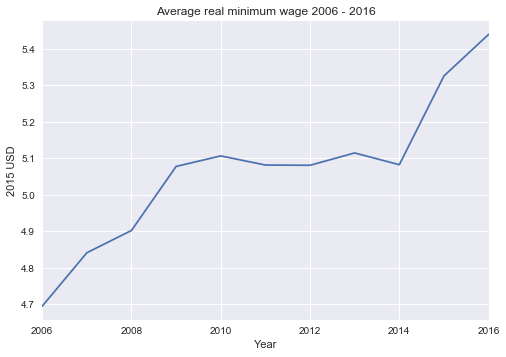

In [61]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2006 - 2016') 
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [62]:
merged.mean(level='Continent',axis=1).head()

Continent,America,Asia,Australia,Europe
Time,,,,
2006-01-01,2.80,4.29,10.25,4.80
2007-01-01,2.85,4.44,10.73,4.94
2008-01-01,2.99,4.45,10.76,4.99
2009-01-01,3.23,4.53,10.97,5.16
2010-01-01,3.34,4.53,10.95,5.17


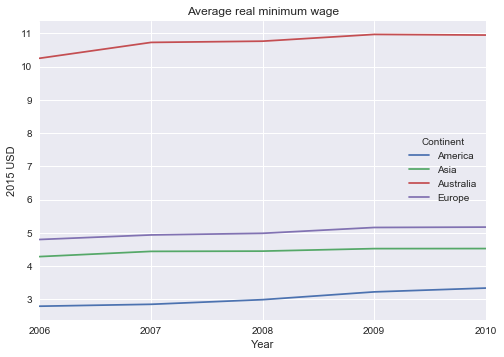

In [64]:
merged.mean(level='Continent',axis=1).head().plot()
plt.title('Average real minimum wage') 
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

We will drop Australia as a continent for plotting purposes

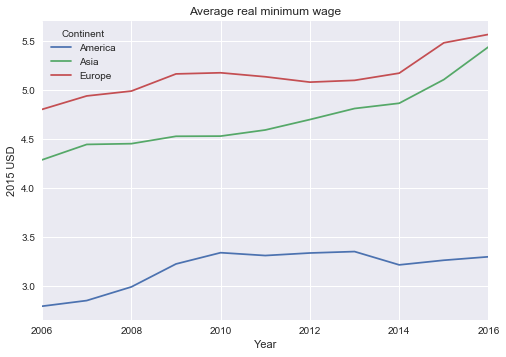

In [66]:
merged = merged.drop('Australia', level='Continent', axis=1) 
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year') 
plt.show()

In [67]:
merged.stack().describe()

Continent,America,Asia,Europe
count,69.00,44.00,200.00
mean,3.19,4.70,5.15
std,3.02,1.56,3.82
min,0.52,2.22,0.23
25%,1.03,3.37,2.02
50%,1.44,5.48,3.54
75%,6.96,5.95,9.70
max,8.48,6.65,12.39


In [77]:
grouped = merged.groupby(level='Continent', axis=1)

In [78]:
grouped.size()

Continent
America     7
Asia        4
Europe     19
dtype: int64

groups.keys() will return the keys from the groupby object

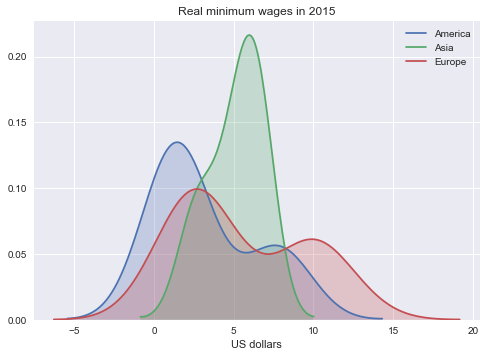

In [79]:
import seaborn as sns
continents = grouped.groups.keys()
for continent in continents: 
    sns.kdeplot(grouped.get_group(continent)['2015'].unstack(),label=continent, shade=True)
plt.title('Real minimum wages in 2015') 
plt.xlabel('US dollars')
plt.show()
